In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score, precision_score,ConfusionMatrixDisplay


In [2]:
data = pd.read_csv(r'/IrisNew.csv')
df = pd.DataFrame(data, columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])
print(df)

     Sepal Length  Sepal Width  Petal Length  Petal Width      Class
0             4.3          3.0           1.1          0.1     setosa
1             4.4          2.9           1.4          0.2     setosa
2             4.4          3.0           1.3          0.2     setosa
3             4.4          3.2           1.3          0.2     setosa
4             4.5          2.3           1.3          0.3     setosa
..            ...          ...           ...          ...        ...
145           7.7          2.6           6.9          2.3  virginica
146           7.7          2.8           6.7          2.0  virginica
147           7.7          3.0           6.1          2.3  virginica
148           7.7          3.8           6.7          2.2  virginica
149           7.9          3.8           6.4          2.0  virginica

[150 rows x 5 columns]


In [3]:
#split the data into training and testing
X = df.values[:,0:4] # first 4 columns are independent variables
Y = df.values[:,4] # last column is dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=100)
#test size = 70% training and 30 percent testing


Confusion Matrix:


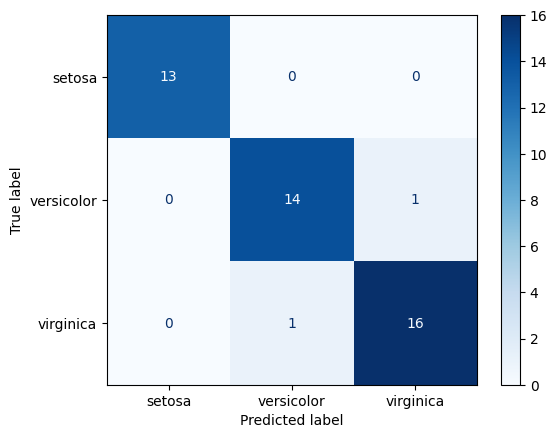

Decision Tree Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Decision Tree Accuracy: 0.9555555555555556
Decision Tree Recall: 0.9581699346405229
Decision Tree Precision: 0.9581699346405229


In [4]:
#Decision tree model using entropy as criterion
dt_classifier = DecisionTreeClassifier(criterion = "entropy",random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Confusion Matrix and Metrics for Decision Tree
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_classification_rep = classification_report(y_test, dt_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions, average='macro')
dt_precision = precision_score(y_test, dt_predictions, average='macro')

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_predictions), display_labels=dt_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("best knn.png")
plt.show()
print("Decision Tree Classification Report:\n", dt_classification_rep)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree Precision:", dt_precision)

Decision Tree Confusion Matrix:



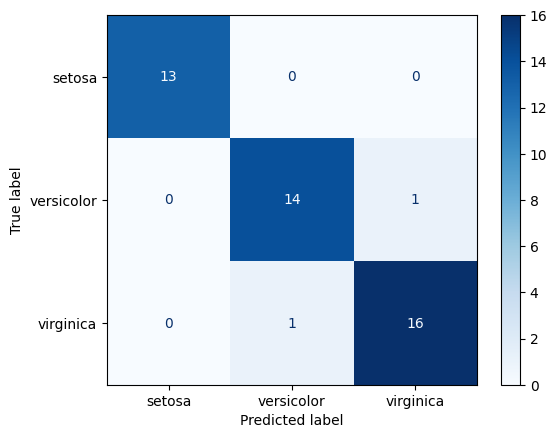

Decision Tree Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Decision Tree Accuracy: 0.9555555555555556
Decision Tree Recall: 0.9581699346405229
Decision Tree Precision: 0.9581699346405229


In [5]:
#Decision tree model using gini as criterion
dt_classifier_gini = DecisionTreeClassifier(criterion = "gini",random_state=42)
dt_classifier_gini.fit(X_train, y_train)
dt_predictions_gini = dt_classifier.predict(X_test)

# Confusion Matrix and Metrics for Decision Tree
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions_gini)
dt_classification_rep = classification_report(y_test, dt_predictions_gini)
dt_accuracy = accuracy_score(y_test, dt_predictions_gini)
dt_recall = recall_score(y_test, dt_predictions_gini, average='macro')
dt_precision = precision_score(y_test, dt_predictions_gini, average='macro')

print("Decision Tree Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_predictions_gini), display_labels=dt_classifier_gini.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("best knn.png")
plt.show()
print("Decision Tree Classification Report:\n", dt_classification_rep)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree Precision:", dt_precision)

Logistic Regression Confusion Matrix:



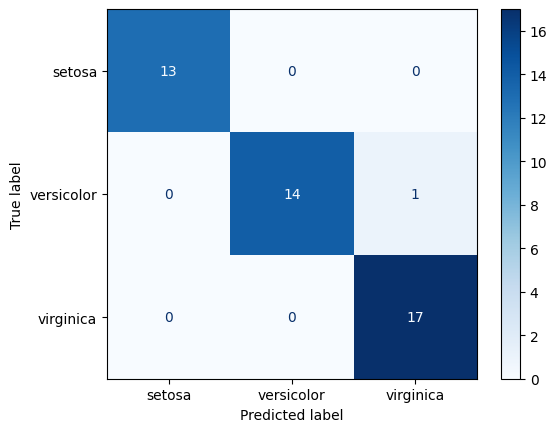

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Logistic Regression Accuracy: 0.9777777777777777
Logistic Regression Recall: 0.9777777777777779
Logistic Regression Precision: 0.9814814814814815


In [6]:
# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Confusion Matrix and Metrics for Decision Tree
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
lr_classification_rep = classification_report(y_test, y_pred_lr)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr, average='macro')
lr_precision = precision_score(y_test, y_pred_lr, average='macro')

print("Logistic Regression Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr), display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("best knn.png")
plt.show()
print("Logistic Regression Classification Report:\n", lr_classification_rep)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression Precision:", lr_precision)

KNN Confusion Matrix:



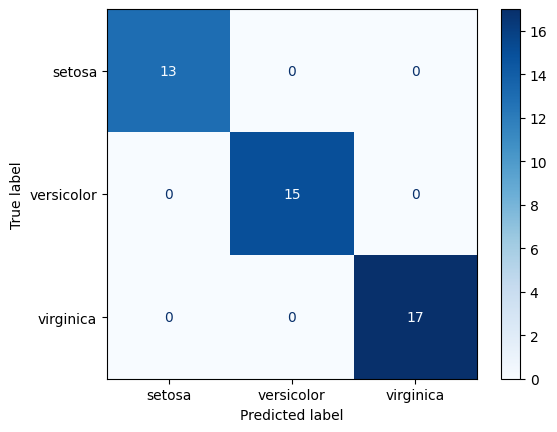

KNN Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

KNN Accuracy: 0.9777777777777777
KNN Recall: 0.9777777777777779
KNN Precision: 0.9814814814814815


In [7]:
k = 5 # You can choose the number of neighbors (k) based on cross-validation.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Confusion Matrix and Metrics for KNN
Knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
Knn_classification_rep = classification_report(y_test, y_pred_knn)
Knn_accuracy = accuracy_score(y_test, y_pred_knn)
Knn_recall = recall_score(y_test, y_pred_knn, average='macro')
Knn_precision = precision_score(y_test, y_pred_knn, average='macro')

print("KNN Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn), display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("best knn.png")
plt.show()
print("KNN Classification Report:\n", lr_classification_rep)
print("KNN Accuracy:", lr_accuracy)
print("KNN Recall:", lr_recall)
print("KNN Precision:", lr_precision)